In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
import time
import matplotlib.pyplot as plt
import warnings
from numpy import loadtxt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder

In [2]:
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
A = "train.csv"

In [4]:
train = pd.read_csv(A)
df = pd.DataFrame(train)
 
df

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85
5,13,A,B,A,A,A,A,A,A,B,...,0.364464,0.401162,0.26847,0.46226,0.50556,0.366788,0.359249,0.345247,0.726792,5142.87
6,14,A,A,A,A,B,A,A,A,A,...,0.381515,0.363768,0.24564,0.40455,0.47225,0.334828,0.352251,0.342239,0.382931,1132.22
7,20,A,B,A,B,A,A,A,A,B,...,0.867021,0.583389,0.90267,0.84847,0.80218,0.644013,0.785706,0.859764,0.242416,3585.75
8,23,A,B,B,B,B,A,A,A,B,...,0.628534,0.384099,0.61229,0.38249,0.51111,0.682315,0.669033,0.756454,0.361191,10280.20
9,24,A,B,A,A,B,B,A,A,B,...,0.713343,0.469223,0.30260,0.67135,0.83510,0.863052,0.879347,0.822493,0.294523,6184.59


In [5]:
n_data = 200

cont_X = train.iloc[0:n_data, 117:131]
cat_X = train.iloc[0:n_data, 1:117]
X = train.iloc[0:n_data, :131]

Y = train.iloc[0:n_data, 131:]

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(cat_X)

OneHotEncoder(categorical_features=None, categories=None,
       dtype=<type 'numpy.float64'>, handle_unknown='ignore',
       n_values=None, sparse=True)

In [6]:
OneHot_X = enc.transform(cat_X).toarray()

In [7]:
new_X = np.c_[OneHot_X, cont_X]
new_X

array([[1.      , 0.      , 0.      , ..., 0.594646, 0.822493, 0.714843],
       [1.      , 0.      , 0.      , ..., 0.366307, 0.611431, 0.304496],
       [1.      , 0.      , 0.      , ..., 0.373424, 0.195709, 0.774425],
       ...,
       [1.      , 0.      , 1.      , ..., 0.500382, 0.733672, 0.259274],
       [1.      , 0.      , 1.      , ..., 0.241676, 0.388569, 0.732078],
       [1.      , 0.      , 0.      , ..., 0.270746, 0.256038, 0.429608]])

In [10]:
'Changing the seed and test_size values will change y_pred'
seed = 7
test_size = 0.2

start_time = time.time()

X_train, X_test, y_train, y_test = train_test_split(OneHot_X, Y, test_size=test_size, random_state=seed)

y_train = y_train.iloc[:,0]
model = XGBRegressor()#objective ='reg:squarederror')
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
print("Mean squared error: %.2f" % mse)

scores = cross_val_score(model, X_train,y_train,cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

print("--- %s seconds ---" % (time.time() - start_time))

Mean squared error: 3177906.92
Mean cross-validation score: 0.13
--- 3.91599988937 seconds ---


In [8]:
#kfold = KFold(n_splits=10, shuffle=True)
#kf_cv_scores = cross_val_score(model, X_train, y_train, cv=kfold )
#print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

In [ ]:
#50,000 has a score of 0.49 and takes 847 seconds to run
#70,000 has a score of 0.48 and takes 30 mins to run


In [9]:
seed = 7
test_size = 0.2


MSE = []
Scores = []
T = []

n_data = 200
for i in range(1, 40):
    print(i)
    n_data = i*500

    cont_X = train.iloc[0:n_data, 117:131]
    cat_X = train.iloc[0:n_data, 1:117]
    X = train.iloc[0:n_data, :131]

    Y = train.iloc[0:n_data, 131:]

    enc = OneHotEncoder(handle_unknown='ignore')
    enc.fit(cat_X)
    
    OneHot_X = enc.transform(cat_X).toarray()
    
    new_X = np.c_[OneHot_X, cont_X]
    
    start_time = time.time()
    
    X_train, X_test, y_train, y_test = train_test_split(OneHot_X, Y, test_size=test_size, random_state=seed)

    y_train = y_train.iloc[:,0]
    model = XGBRegressor()#objective = 'reg:squarederror')
    model.fit(X_train,y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test,y_pred)
    MSE.append(mse)
    
    scores = cross_val_score(model, X_train,y_train,cv=5)
    Scores.append(scores.mean())
    
    T.append(time.time() - start_time)
    
    

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


In [19]:
N_data = []
n_data = 200
for i in range(1, 40):
    n_data = i*500
    N_data.append(n_data)


In [20]:
N_data

[500,
 1000,
 1500,
 2000,
 2500,
 3000,
 3500,
 4000,
 4500,
 5000,
 5500,
 6000,
 6500,
 7000,
 7500,
 8000,
 8500,
 9000,
 9500,
 10000,
 10500,
 11000,
 11500,
 12000,
 12500,
 13000,
 13500,
 14000,
 14500,
 15000,
 15500,
 16000,
 16500,
 17000,
 17500,
 18000,
 18500,
 19000,
 19500]

In [10]:
T

[9.091000080108643,
 18.473999977111816,
 28.329999923706055,
 38.735000133514404,
 49.009000062942505,
 61.71300005912781,
 71.51900005340576,
 82.42799997329712,
 94.6010000705719,
 106.05200004577637,
 116.45000004768372,
 129.3069999217987,
 141.13700008392334,
 154.5770001411438,
 167.92999982833862,
 180.90499997138977,
 190.2699999809265,
 202.95199990272522,
 215.37599992752075,
 225.73300004005432,
 239.46600008010864,
 251.0899999141693,
 264.4930000305176,
 278.1340000629425,
 294.94799995422363,
 328.5739998817444,
 347.7239999771118,
 321.09100008010864,
 294.25,
 284.5659999847412,
 267.06699991226196,
 243.72499990463257,
 250.29999995231628,
 259.85400009155273,
 271.20099997520447,
 276.2189998626709,
 289.65499997138977,
 294.91299986839294,
 305.1579999923706]

In [11]:
Scores

[0.242773458156445,
 0.30960543551987424,
 0.39971366593084146,
 0.44043722268243596,
 0.42834856436894847,
 0.4290943285948631,
 0.39530985173350797,
 0.43180842204888137,
 0.439022510525919,
 0.46598622991039723,
 0.460741682914058,
 0.4535367492599424,
 0.4622852429312439,
 0.4554700304348237,
 0.4641787466417317,
 0.47011146129941056,
 0.4576318323491888,
 0.43853441864373915,
 0.46041293236799585,
 0.45495985067701,
 0.469857600087528,
 0.46159776228123145,
 0.456382547672556,
 0.4716424650169316,
 0.4665808564489426,
 0.4786258040642183,
 0.47224959791559834,
 0.4835692372304875,
 0.47030068350671694,
 0.4735110216486097,
 0.4802035751340418,
 0.429762565155192,
 0.44362583540109835,
 0.4794478649869922,
 0.46149833484178365,
 0.4742996363947577,
 0.46682511810072247,
 0.4810566462398729,
 0.45723447236083903]

In [12]:
MSE

[4834965.468087755,
 4793732.548407977,
 3363023.3808295797,
 3467659.684660648,
 4144140.6594156255,
 4972660.396930763,
 4193323.3115581404,
 5008903.658256296,
 5147261.701117768,
 3994935.9993022946,
 3836776.4942712374,
 5108089.675428495,
 4992616.012814525,
 4604694.980536836,
 4092781.9212089805,
 4399964.397324874,
 3572751.482289671,
 3754535.7223205115,
 5071120.092175921,
 4573272.144691605,
 4897804.620623415,
 4684507.5020256685,
 4700425.014358338,
 4413596.221742541,
 4320561.595222263,
 4505958.862285116,
 5186984.222889305,
 5817394.027350367,
 4642678.542651328,
 6369298.649852726,
 6471444.519530236,
 5502903.120358293,
 5874087.16714432,
 7144822.324036899,
 4932618.205203971,
 4913997.779188964,
 4358737.856978842,
 5191020.013997351,
 4206401.895679674]

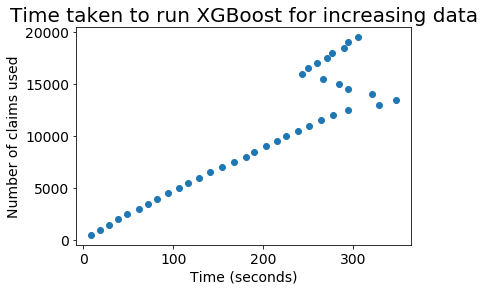

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('Time taken to run XGBoost for increasing data',fontsize = 20)
ax.tick_params(labelsize=14)
ax.set_xlabel('Time (seconds)',fontsize = 14 )
ax.set_ylabel('Number of claims used',fontsize = 14)
ax.tick_params(labelsize=14)

#plt.plot(T, N_data, 'blue')
plt.plot(T, N_data, 'o')

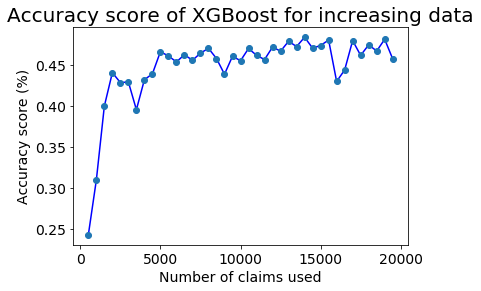

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('Accuracy score of XGBoost for increasing data',fontsize = 20)
ax.tick_params(labelsize=14)
ax.set_xlabel('Number of claims used',fontsize = 14 )
ax.set_ylabel('Accuracy score (%)',fontsize = 14)
ax.tick_params(labelsize=14)

plt.plot(N_data, Scores, 'blue')
plt.plot(N_data, Scores, 'o')

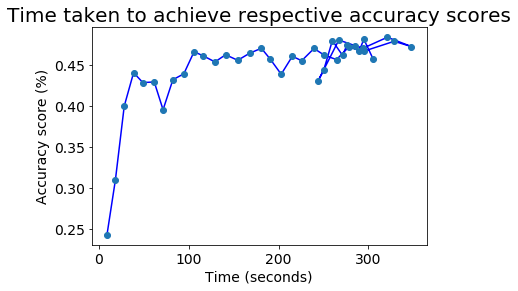

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('Time taken to achieve respective accuracy scores',fontsize = 20)
ax.tick_params(labelsize=14)
ax.set_xlabel('Time (seconds)',fontsize = 14 )
ax.set_ylabel('Accuracy score (%)',fontsize = 14)
ax.tick_params(labelsize=14)

plt.plot(T, Scores, 'blue')
plt.plot(T, Scores, 'o')